In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [3]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [4]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [5]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [6]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [7]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [8]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [9]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [10]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [11]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [12]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [13]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [14]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [15]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [16]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [17]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [18]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [20]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [24]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Outbending DVCS

In [25]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/epg/"
epg_4398 = pd.read_pickle(parent_epg + "4398" + "_epg.pkl")
epg_4243 = pd.read_pickle(parent_epg + "4243" + "_epg.pkl")

In [26]:
dvcsSimOutb = epg_4398
bkgSimOutb = epg_4243

In [27]:
dvcsSimOutb = dvcsSimOutb.loc[dvcsSimOutb.Ge>2]
bkgSimOutb = bkgSimOutb.loc[bkgSimOutb.Ge>2]

## CDFT cuts

In [52]:
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]

In [53]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [54]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

1.4432899320127035e-15 246.24940964406656 94
[ 0.44276622  0.03569569  0.12647488  0.82394694  0.43378214 -2.36554407] -0.2240519605312445 0.29544334861588484 1.4432899320127035e-15
0.06294492866135981 115.821707375409 94
[ 0.30169323  0.03491774  0.10485989  1.52607594  0.96803838 -8.78478525] -0.18043813964282032 0.2502736194582471 0.06294492866135981
0.6491614166627209 88.20102290991338 94
[  0.21346939   0.03504377   0.09176257   2.04518095   1.485127
 -15.68275078] -0.153413507910393 0.22350105200130116 0.6491614166627209
0.2066997640474696 104.95270057789133 94
0.6335371244099098 88.75202422052584 94
0.7304624088973182 85.19686620334974 94
[ 8.14314635e-02  3.78632360e-02  6.39217914e-02  3.39882633e+00
  3.21465803e+00 -4.02503208e+01] -0.09341607352853691 0.1691425455561611 0.7304624088973182
0.5172724568682803 92.74406389521424 94
0.7549782850898141 84.22402015346938 94
[ 0.43242912  0.0386423   0.0941486   2.52798102  0.43333138 -4.86135447] -0.15471527464019175 0.23199988453

In [55]:
len(dvcsSimOutbCDFT)

2084079

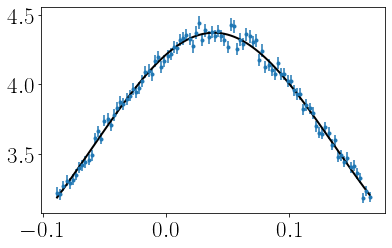

In [56]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [57]:
print(lb_opt, ub_opt)

-0.33795208512108993 0.4152366950188186


In [58]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_ep<0.415)&(dvcsSimOutbCDFT.MM2_ep>-0.338)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MM2_ep<0.415)&(bkgSimOutbCDFT.MM2_ep>-0.338)]

In [59]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 444994.25127242215 94
0.0 272.41456778685364 94
0.05476143081101381 116.92486649459127 94
[ 0.44959071  0.885272    0.15457393 -2.54448918  7.20285629 -3.62784804] 0.5678159659659028 1.2027280433470289 0.05476143081101381
0.06856044355194069 115.13145098597549 94
[ 0.42538747  0.88500609  0.15153528 -2.9043806   8.17613809 -4.16552798] 0.5737906744307957 1.1962215077664555 0.06856044355194069
0.49259549614575426 93.58785701627134 94
[ 0.48947297  0.88461067  0.15694243 -2.3887774   6.75804732 -3.35330801] 0.5622903265807643 1.2069310086292833 0.49259549614575426
0.06242698037802563 115.8878939729054 94
0.030313640102450745 121.35014834813676 94
0.032637617940051156 120.8177739555189 94
0.04618040308226323 118.24075398277475 94
0.06949958760497743 115.02057236944063 94


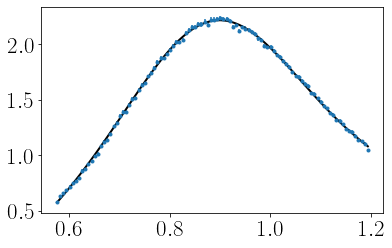

In [60]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [61]:
print(lb_opt, ub_opt)

0.2568409546558401 1.5123803805542075


In [62]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_eg<1.512)&(dvcsSimOutbCDFT.MM2_eg>0.257)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MM2_eg<1.512)&(bkgSimOutbCDFT.MM2_eg>0.257)]

In [63]:
len(dvcsSimOutbCDFT)

1201532

In [64]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.ME_epg, bins = np.linspace(-0.2, 0.2, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.ME_epg, bins = np.linspace(-0.2, 0.2, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.8607269890367564 79.31002581177667 94
[1.01658006 0.01107439 0.12630651 0.1880313  1.78010915 4.65023721] -0.2483274738376001 0.2704762495137355 0.8607269890367564
4.1364872582771994e-07 177.70752599186346 94
0.000615137635498364 144.67953811374514 94
0.05905600277235257 116.33010292023495 94
0.38041299763283154 97.55252943800068 94
0.4751445534634001 94.18804547941524 94
0.4713052835850632 94.3206130038743 94
0.45967812406156894 94.72346539545322 94
0.49193080273827006 93.61065470704781 94
0.417989253215973 96.18984634491646 94


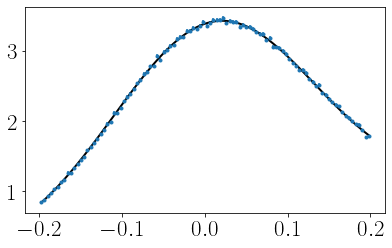

In [65]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [66]:
print(lb_opt, ub_opt)

-0.49415166064877375 0.5163004363249092


In [67]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.ME_epg<0.516)&(dvcsSimOutbCDFT.ME_epg>-0.494)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.ME_epg<0.516)&(bkgSimOutbCDFT.ME_epg>-0.494)]

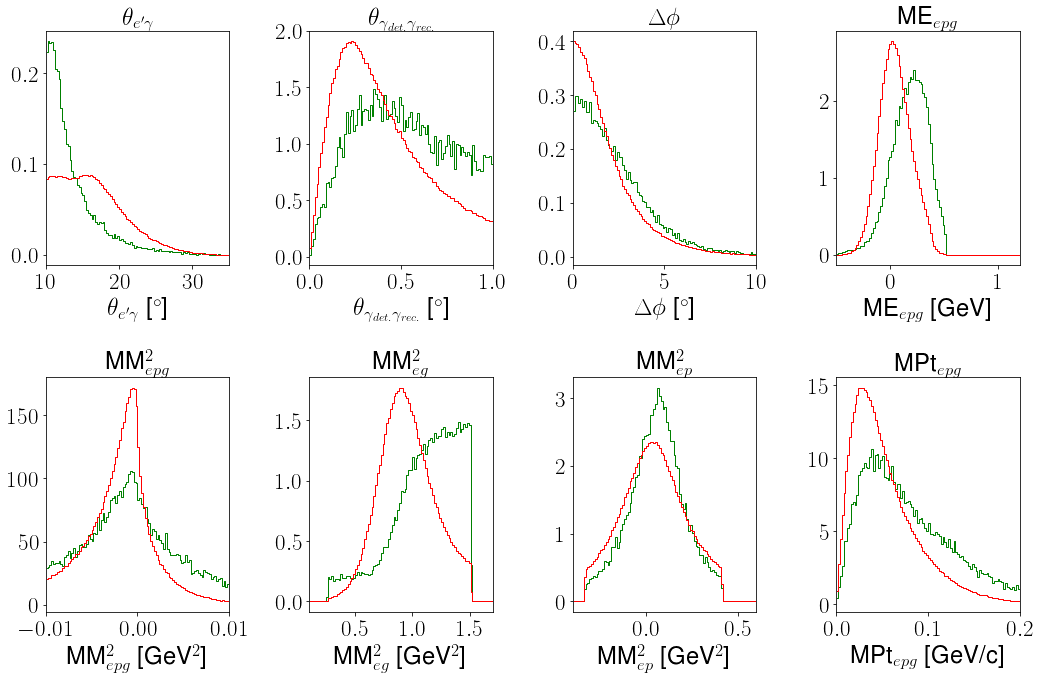

<Figure size 432x288 with 0 Axes>

In [68]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [72]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.coplanarity, bins = np.linspace(0, 8, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.coplanarity, bins = np.linspace(0, 8, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.8, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b, c  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 9#max(halfnorm.ppf(0.9, scale = scale), 0.002)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 4*scale#halfnorm.ppf(1-2*0.00003, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

1.4432899320127035e-15 247.723725524084 95
[ 0.44846037  1.55228858  0.18127328 -0.0407854   0.00238182] 0 9 1.4432899320127035e-15
0.0 377.70448447491754 95
0.0 377.70448447491754 95
0.0 377.70448447491754 95
0.0 377.70448447491754 95
0.0 377.70448447491754 95
0.0 377.70448447491754 95
0.0 377.70448447491754 95
0.0 377.70448447491754 95
0.0 377.70448447491754 95


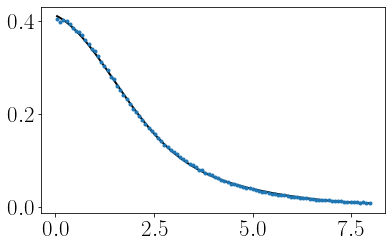

In [73]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [74]:
print(ub_opt)

6.2091543160549305


In [75]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.coplanarity<6.209)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.coplanarity<6.209)]

In [68]:
np.linspace(3, 8.5, 12)

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5])

In [45]:
GeEdges = np.linspace(3.5, 8.5, 11)
lbs = []
ubs = []
for j in range(len(GeEdges[:-1])):
    df1 = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.Ge>GeEdges[j])&(dvcsSimOutbCDFT.Ge<GeEdges[j+1])]
    df2 = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.Ge>GeEdges[j])&(bkgSimOutbCDFT.Ge<GeEdges[j+1])]
    pvalue_opt = 0
    for i in range(0, 1):
        if i == 0:
            print(len(df1))
            simDist_dvcs, bins = np.histogram(df1.coneAngle, bins = 21)
            bins = np.linspace(bins[np.argmax(simDist_dvcs)] -2.5, bins[np.argmax(simDist_dvcs)] + 4, 21)
            simDist_dvcs, _ = np.histogram(df1.coneAngle, bins = bins)
            simDist_dvpi0, _ = np.histogram(df2.coneAngle, bins = bins)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
            uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
            params = [1, bins[np.argmax(simDist)], 2.5, 0, 0, 0]
        else:
            simDist_dvcs, bins = np.histogram(df1.coneAngle, bins = np.linspace(lb, ub, 101))
            simDist_dvpi0, bins = np.histogram(df2.coneAngle, bins = np.linspace(lb, ub, 101))
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
            uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
        params = res_lsq.x
        Amp, loc, scale, a, b, c = params
        lb = norm.ppf(0.02, loc = loc, scale = scale)
        ub = norm.ppf(0.98, loc = loc, scale = scale)
        pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
        print(pvalue, chi2fit, dof)
        if pvalue>pvalue_opt:
            pvalue_opt = pvalue
            bins_opt = bins
            bincenters_opt = bincenters
            params_opt = res_lsq.x
            lb_opt = loc - 4*scale
            ub_opt = loc + 4*scale
            lbs.append(lb_opt)
            ubs.append(ub_opt)
            dist_opt = simDist
            unc_opt = uncDist
            print(params_opt, lb, ub, pvalue)

60015
0.08516446855789461 21.692177481401014 14
[ 4.44281192e-01  1.03180899e+01  1.20312395e+00  1.09154770e-01
  1.66443134e-02 -1.74519098e-03] 7.847175368561664 12.789004361500961 0.08516446855789461
69735
0.003543149910915977 32.37414088112294 14
[ 3.33542547e-01  1.08761038e+01  1.40525005e+00 -3.10538138e-01
  9.47553695e-02 -5.05262785e-03] 7.9900730402231845 13.76213457571844 0.003543149910915977
76452
0.8426654632035591 8.815813116033345 14
[ 3.59174508e-01  1.17703177e+01  1.31885044e+00  5.54076674e-02
  2.83861705e-02 -1.98052663e-03] 9.061730014783468 14.478905339676235 0.8426654632035591
83746
0.11161540878130527 20.625729141167664 14
[ 3.53850844e-01  1.26720371e+01  1.34844273e+00  6.20677053e-02
  2.39609416e-02 -1.59343490e-03] 9.902674304354042 15.441399879857235 0.11161540878130527
94472
0.06772526192628225 22.565067700450513 14
[ 1.89405040e-01  1.36640077e+01  1.20482186e+00 -6.92516962e-01
  1.35828740e-01 -5.46625358e-03] 11.189606134172648 16.13840929832905 0.

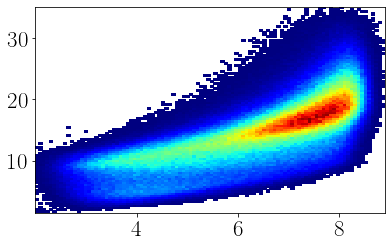

In [46]:
plt.hist2d(dvcsSimOutbCDFT.Ge, dvcsSimOutbCDFT.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

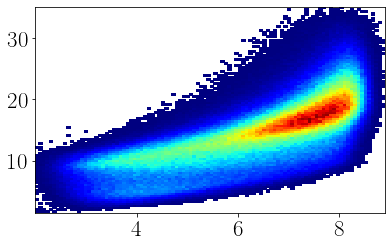

In [50]:
plt.hist2d(dvcsSimOutbCDFT.Ge, dvcsSimOutbCDFT.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

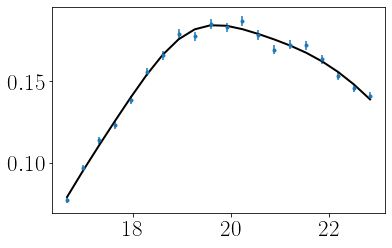

In [71]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [72]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[-0.23361414  4.46006976  2.74927422]
[ 0.556893   -5.22117026 19.65090333]


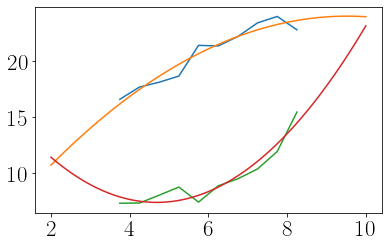

In [74]:
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([-0.234, 4.460, 2.749])(np.linspace(2, 10, 101)))
# plt.plot(np.linspace(2, 10, 101), np.poly1d(res_lsq.x)(np.linspace(2, 10, 101)))
print(res_lsq.x)

plt.plot((GeEdges[1:]+GeEdges[:-1])/2, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.557, -5.221, 19.651])(np.linspace(2, 10, 101)))
# plt.plot(np.linspace(2, 10, 101), np.poly1d(res_lsq.x)(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [76]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.coneAngle<np.poly1d([-0.234, 4.460, 2.749])(dvcsSimOutbCDFT.Gp))&(dvcsSimOutbCDFT.coneAngle>np.poly1d([0.557, -5.221, 19.651])(dvcsSimOutbCDFT.Gp))]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.coneAngle<np.poly1d([-0.234, 4.460, 2.749])(bkgSimOutbCDFT.Gp))&(bkgSimOutbCDFT.coneAngle>np.poly1d([0.557, -5.221, 19.651])(bkgSimOutbCDFT.Gp))]

In [77]:
len(dvcsSimOutbCDFT)

886952

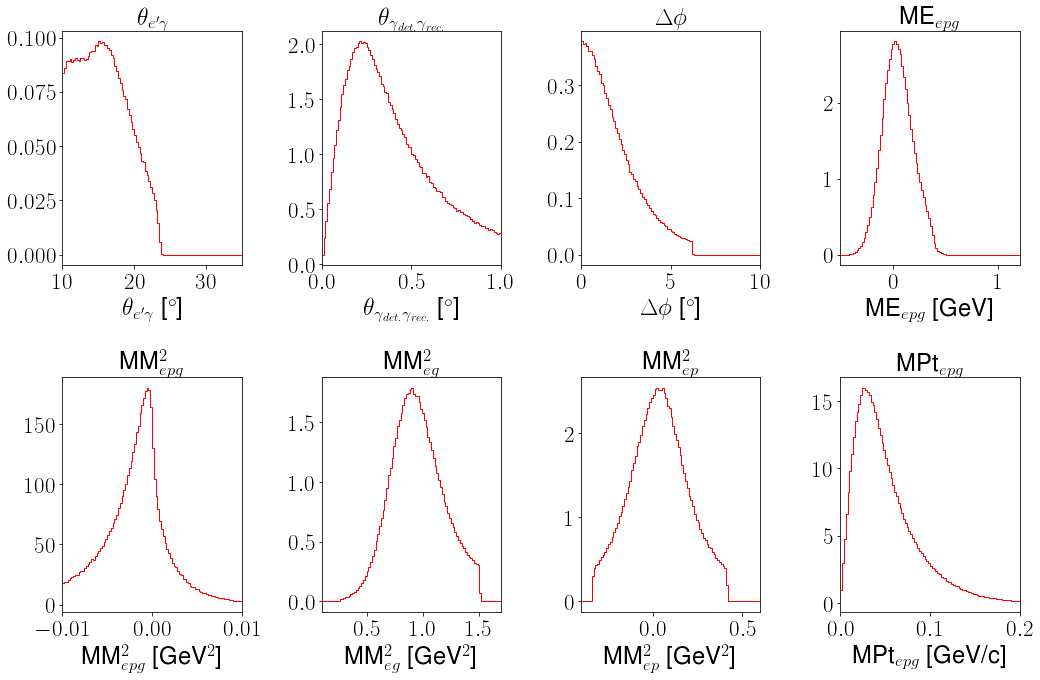

<Figure size 432x288 with 0 Axes>

In [78]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [79]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MPt, bins = np.linspace(0.005, 0.05, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MPt, bins = np.linspace(0.005, 0.05, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = min(norm.ppf(0.9, loc = loc, scale = scale), 0.04)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+4*scale#norm.ppf(1-2*0.0228, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.8248091747041475 9.096658933599228 14
[ 1.10985093e+00  1.95005603e-02  1.93263288e-02 -1.37218052e+01
  9.63554179e+02 -8.89396280e+03] 0.005 0.04 0.8248091747041475
0.21458840888222253 104.54988566653321 94
0.21514775078483106 104.52169372638603 94
0.21543469509154778 104.50724962562498 94
0.2154862350379192 104.50465654851537 94
0.2155626983679394 104.50081026740713 94
0.2156510354006408 104.49636781311786 94
0.21570186203275377 104.49381228520114 94
0.2157354794476648 104.49212223931875 94
0.2157547587996821 104.49115308687092 94


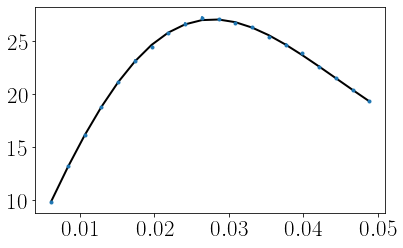

In [80]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [81]:
params_opt

array([ 1.10985093e+00,  1.95005603e-02,  1.93263288e-02, -1.37218052e+01,
        9.63554179e+02, -8.89396280e+03])

In [82]:
print(ub_opt)

0.09680587555065921


In [83]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MPt<0.0968)]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[(bkgSimOutbCDFT.MPt<0.0968)]

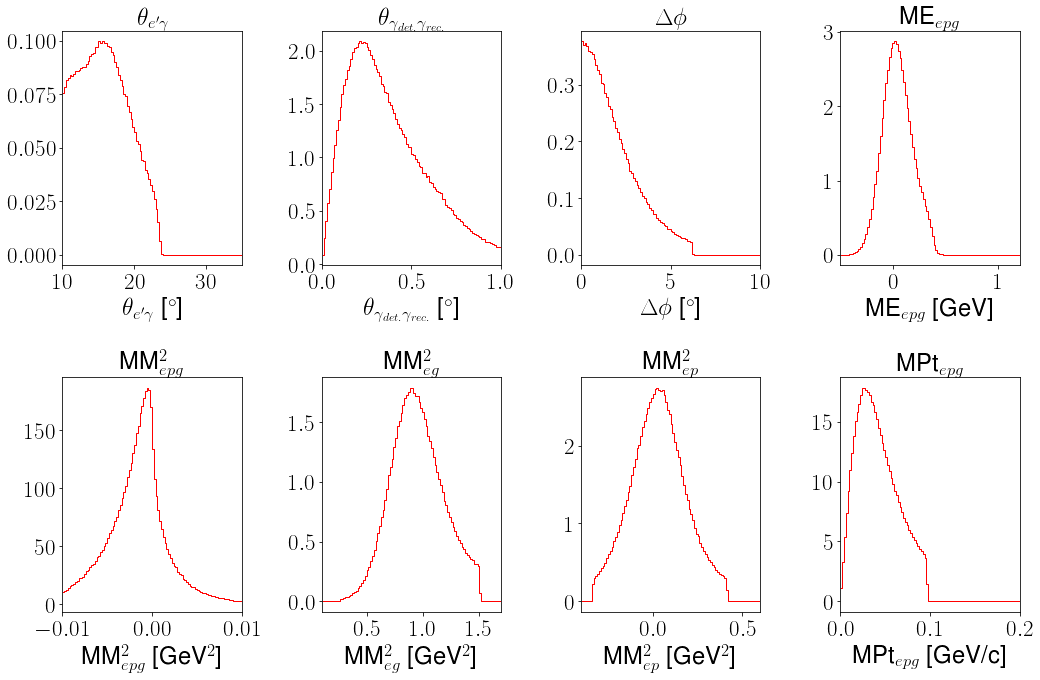

<Figure size 432x288 with 0 Axes>

In [84]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [85]:
pvalue_opt = -0.1
for i in range(0, 3):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.reconGam, bins = np.linspace(0.005, 0.5, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.reconGam, bins = np.linspace(0.005, 0.5, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = min(norm.ppf(0.9, loc = loc, scale = scale), 0.6)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+4*scale#norm.ppf(1-2*0.0228, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.053701013062043335 23.424668453797356 14
[  0.81995079   0.15779695   0.14653218  -1.2268596   11.93881095
 -13.81701464] 0.005 0.3455854970868958 0.053701013062043335
0.04405667512865563 118.59806991200377 94
0.07338291075113079 114.57467587487356 94
[  0.87405682   0.15485806   0.15560007  -1.3536223   10.5192909
 -11.29940962] 0.005 0.35426757668201403 0.07338291075113079


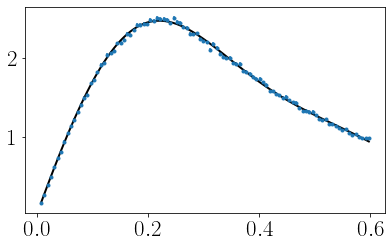

In [86]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [87]:
print(ub_opt)

0.7772583547571073


In [88]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.reconGam<0.778]
bkgSimOutbCDFT = bkgSimOutbCDFT.loc[bkgSimOutbCDFT.reconGam<0.778]

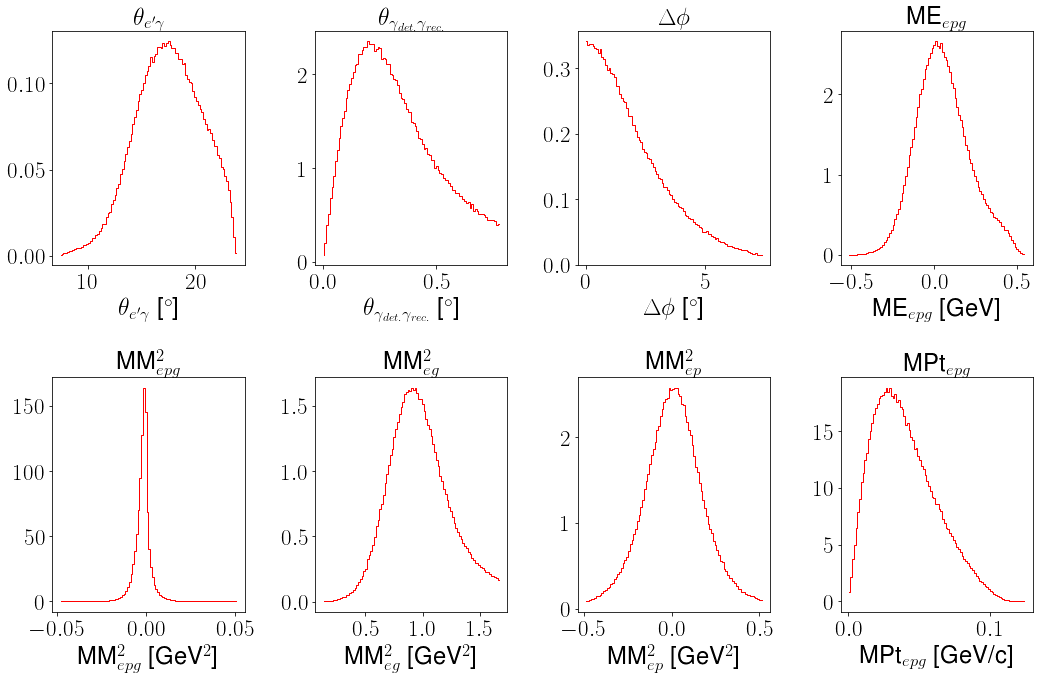

<Figure size 432x288 with 0 Axes>

In [89]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [91]:
print(dvcsSimOutbCDFT.MM2_epg.mean()+4*dvcsSimOutbCDFT.MM2_epg.std(), dvcsSimOutbCDFT.MM2_epg.mean()-4*dvcsSimOutbCDFT.MM2_epg.std())

0.015710463605489333 -0.019432757517014745
